<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB
Average Sales:

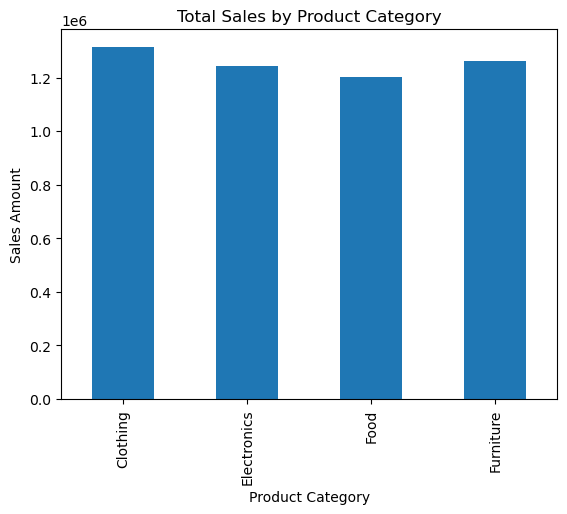

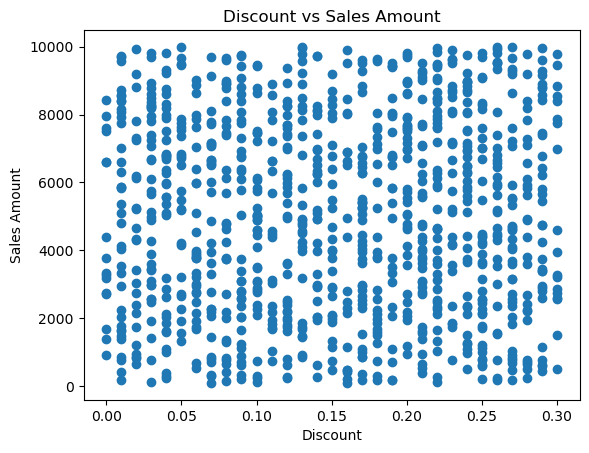

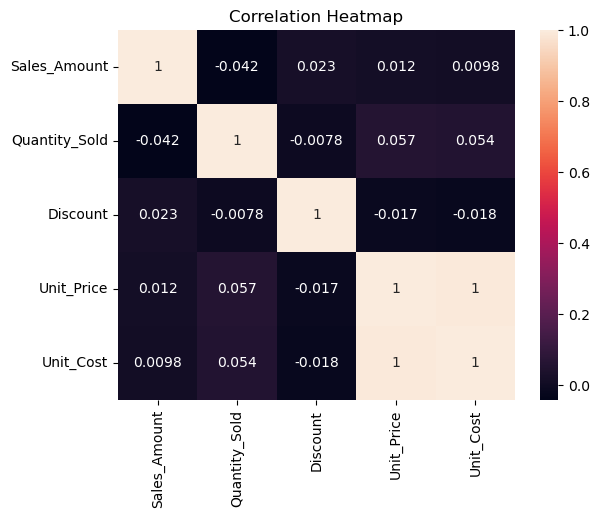

      sqft_living  bedrooms  bathrooms  floors
0            1340       3.0       1.50     1.5
1            3650       5.0       2.50     2.0
2            1930       3.0       2.00     1.0
3            2000       3.0       2.25     1.0
4            1940       4.0       2.50     1.0
...           ...       ...        ...     ...
4595         1510       3.0       1.75     1.0
4596         1460       3.0       2.50     2.0
4597         3010       3.0       2.50     2.0
4598         2090       4.0       2.00     1.0
4599         1490       3.0       2.50     2.0

[4600 rows x 4 columns]
0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64
Mean Squared Error: 991657231245.9535
R2 Score: 0.027640545181147225


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#--------sales---------
df = pd.read_csv("sales.csv.csv")
df.head()
df.info()
df.describe()
print("Average Sales:", df['Sales_Amount'].mean())
df.groupby('Product_Category')['Sales_Amount'].sum().plot(kind='bar')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Sales Amount")
plt.show()
plt.scatter(df['Discount'], df['Sales_Amount'])
plt.xlabel("Discount")
plt.ylabel("Sales Amount")
plt.title("Discount vs Sales Amount")
plt.show()
sns.heatmap(
    df[['Sales_Amount','Quantity_Sold','Discount','Unit_Price','Unit_Cost']].corr(),
    annot=True
)
plt.title("Correlation Heatmap")
plt.show()
### Observations
# Furniture and Electronics generate higher sales.
# Higher discounts slightly reduce sales amount.
# Quantity sold has positive correlation with sales.


#-------House------
df = pd.read_csv("house.csv.csv")
df.head()

#Data cleaning
df.isnull().sum()
df.dropna(inplace=True)
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors']]
y = df['price']
print(X)
print(y)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



